In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the CSV file
df = pd.read_csv("data/fish_datasheet.csv")

In [4]:
# Relevant columns for NH_df
NH_columns = ["Name", "NH Jan", "NH Feb", "NH Mar", "NH Apr", "NH May",
              "NH Jun", "NH Jul", "NH Aug", "NH Sep", "NH Oct", "NH Nov",
              "NH Dec"]
NH_df = df[NH_columns].copy()

print("NH_df:")
NH_df.head()

NH_df:


,Name,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec
0,anchovy,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN
2,arapaima,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN
3,arowana,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN
4,barred knifejaw,NaN,NaN,All day,All day,All day,All day,All day,All day,All day,All day,All day,NaN


In [5]:
# Relevant columns for SH_df
SH_columns = ["Name", "SH Jan", "SH Feb", "SH Mar", "SH Apr", "SH May",
              "SH Jun", "SH Jul", "SH Aug", "SH Sep", "SH Oct", "SH Nov",
              "SH Dec"]
SH_df = df[SH_columns].copy()

print("\nSH_df:")
SH_df.head()


SH_df:


,Name,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec
0,anchovy,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM
2,arapaima,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
3,arowana,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
4,barred knifejaw,All day,All day,All day,All day,All day,NaN,NaN,NaN,All day,All day,All day,All day


In [6]:
def plot_spawning_calendar(dataframe: pd.DataFrame, title: str, filename: str) -> None:
    """Creates a plot for the fish in a calendar style and saves it as image.

    Args:
        dataframe (pd.DataFrame): The dataframe with the data for the plot.
        title (str): The title of the plot.
        filename (str): The filename of the saved image.
    """

    plt.figure(figsize=(12, len(dataframe) * 0.5))
    # Convert to 1s and NaNs (1 means spawning, NaN means no spawn)
    spawn_data = dataframe.set_index("Name").notna().astype(int)

    ax = sns.heatmap(spawn_data, cmap="Greens", linewidths=0.5, cbar=False)

    ax.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
    plt.xlabel("")
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    plt.ylabel("")
    plt.title(title, loc="center")
    plt.xticks(rotation=45)
    plt.yticks()

    plt.savefig("static/images/" + filename, bbox_inches="tight", dpi=300)
    plt.show()

    plt.close()

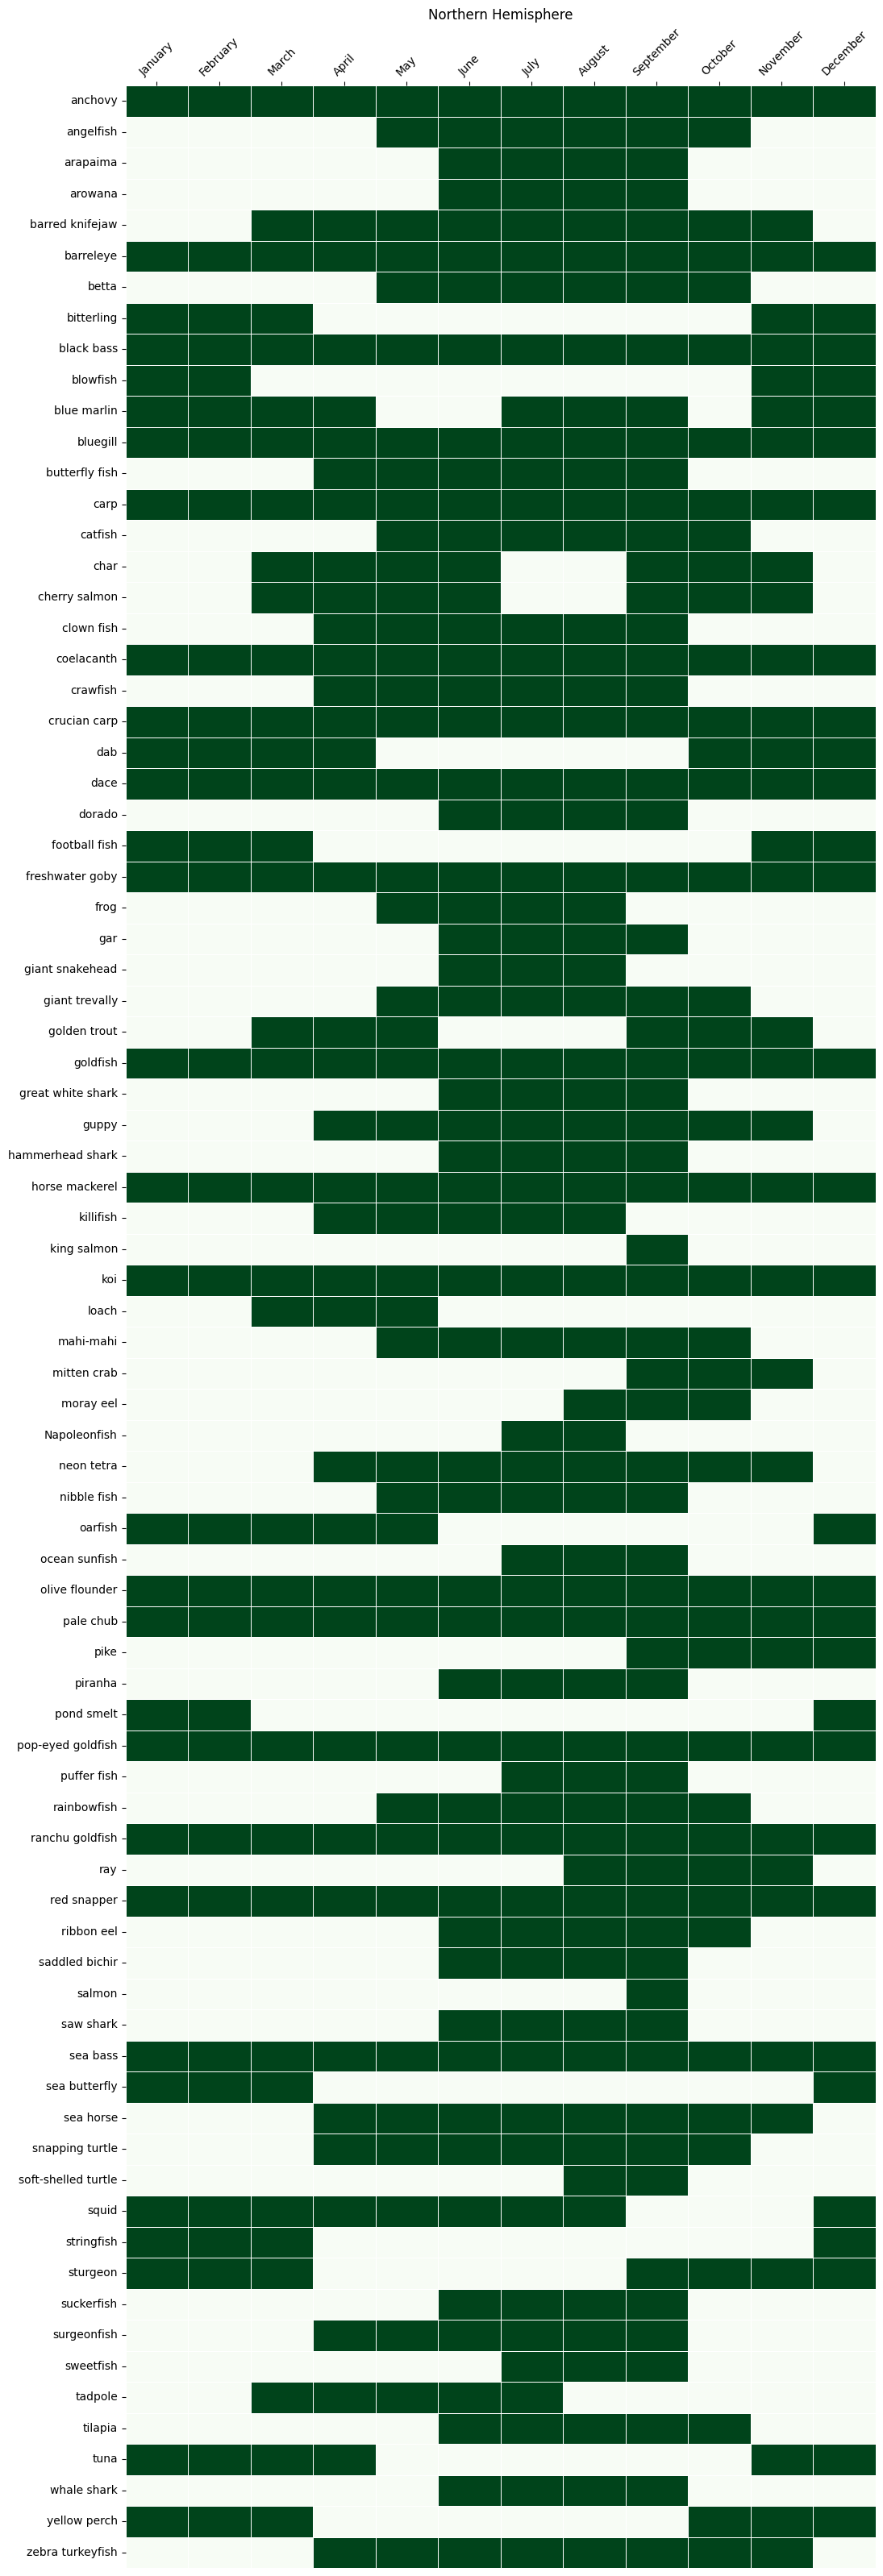

In [7]:
plot_spawning_calendar(NH_df, "Northern Hemisphere", "NH_spawning_calendar.png")

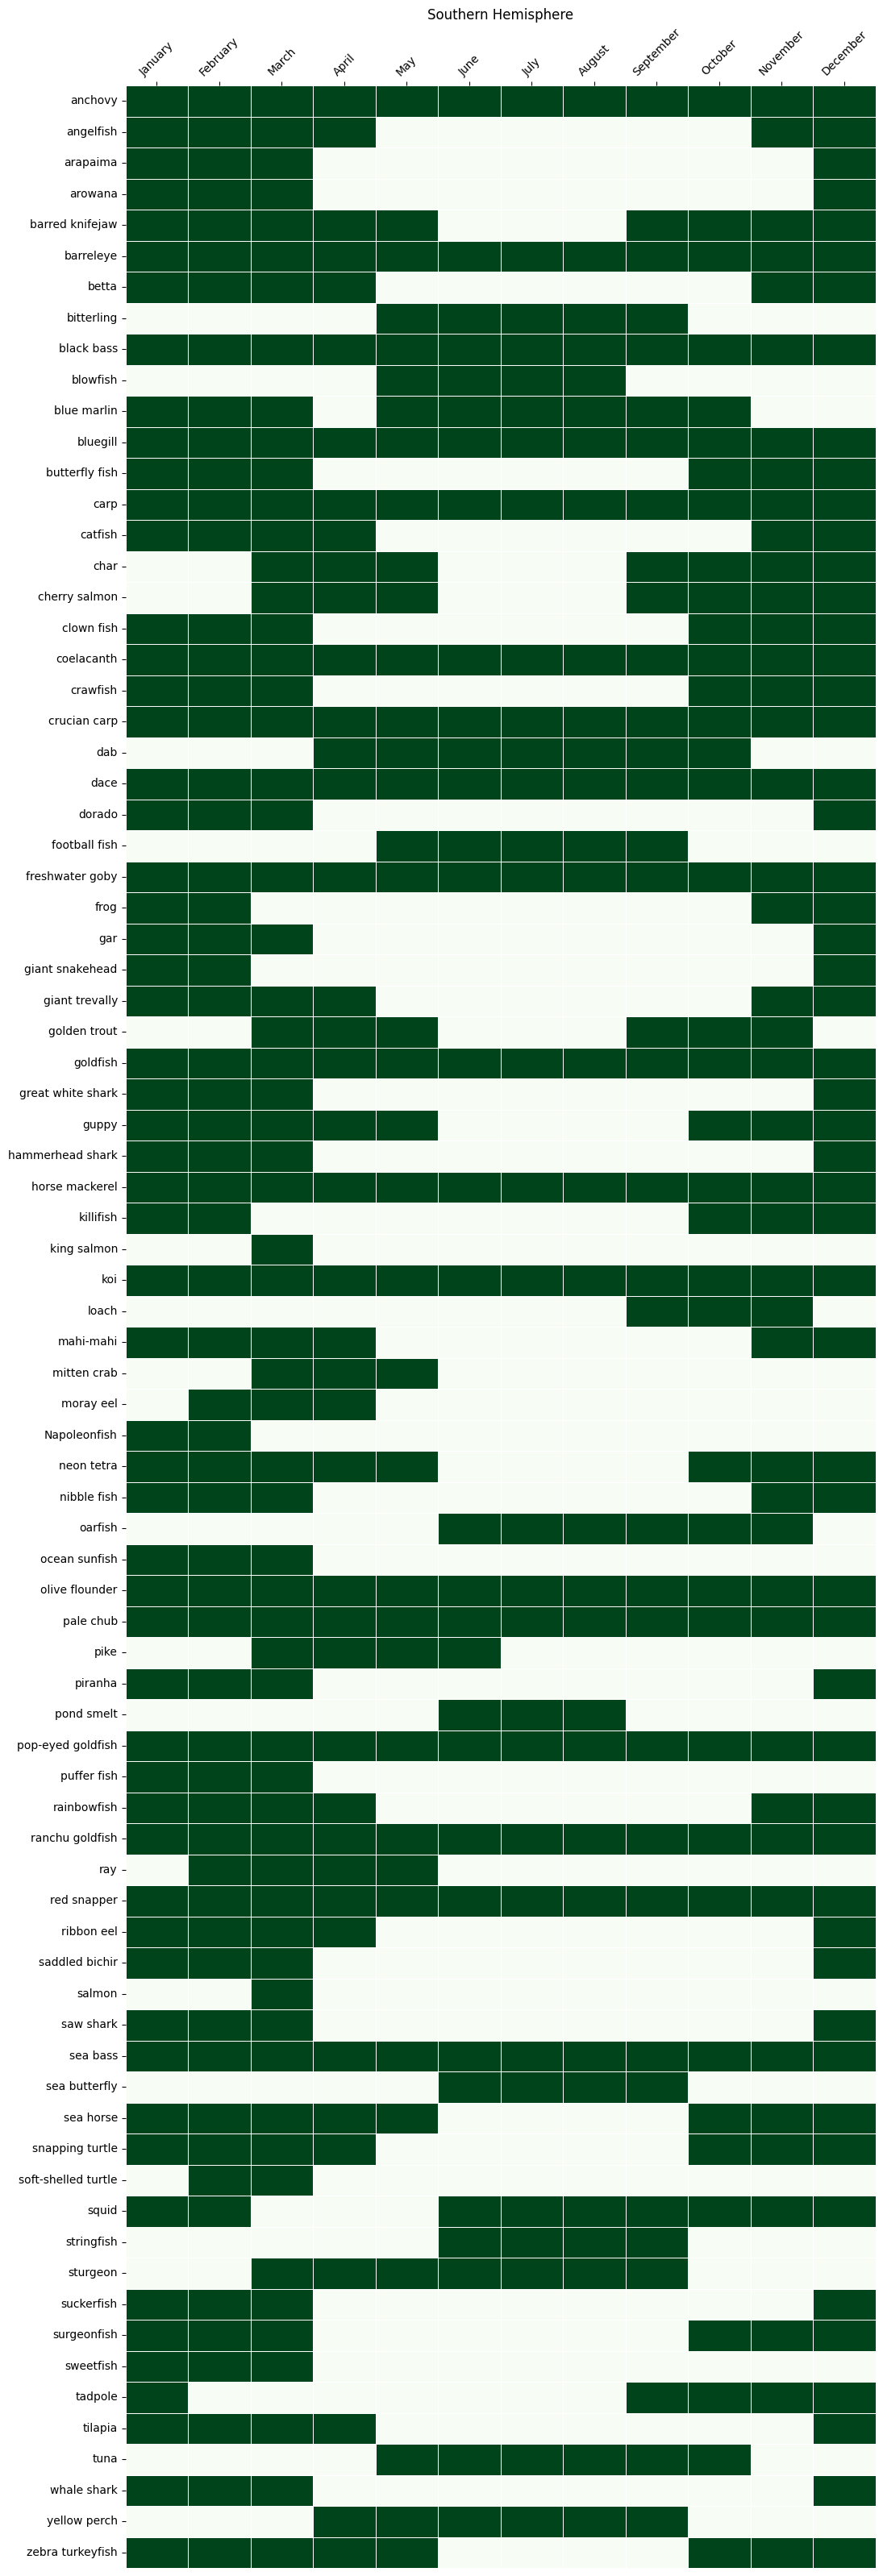

In [8]:
plot_spawning_calendar(SH_df, "Southern Hemisphere", "SH_spawning_calendar.png")
all_fishes: list[str] = list(df["Name"].dropna().unique())
renamed_fish: dict[str, str] = {"pop eyed goldfish": "pop-eyed goldfish",
                                "soft shelled turtle": "soft-shelled turtle",
                                "napoleonfish": "Napoleonfish",
                                "mahi mahi": "mahi-mahi"
                                }

In [9]:
def get_caught_fish() -> list[str]:
    """Gets the list of caught fish from the caught.txt file.

    Returns:
        list[str]: A list of the caught fish.
    """
    with open("data/caught.txt", "r", encoding="utf-8") as file:
        caught_items = set()

        for line in file:
            fish_name = line.strip().replace('_', ' ')

            if fish_name in renamed_fish:
                fish_name = renamed_fish[fish_name]

            caught_items.add(fish_name)

    caught_fish = [fish for fish in all_fishes if fish in caught_items]

    return caught_fish

In [10]:
caught_fish = get_caught_fish()

In [12]:
uncaught_fish = [fish for fish in all_fishes if fish not in caught_fish]

In [ ]:
uncaught_NH_df = NH_df[NH_df['Name'].isin(uncaught_fish)].copy()
uncaught_SH_df = SH_df[SH_df['Name'].isin(uncaught_fish)].copy()

Uncaught NH_df:
              Name NH Jan NH Feb NH Mar   NH Apr       NH May       NH Jun  \
2         arapaima    NaN    NaN    NaN      NaN          NaN  4 PM – 9 AM   
3          arowana    NaN    NaN    NaN      NaN          NaN  4 PM – 9 AM   
6            betta    NaN    NaN    NaN      NaN  9 AM – 4 PM  9 AM – 4 PM   
12  butterfly fish    NaN    NaN    NaN  All day      All day      All day   
17      clown fish    NaN    NaN    NaN  All day      All day      All day   

         NH Jul       NH Aug       NH Sep       NH Oct NH Nov NH Dec  
2   4 PM – 9 AM  4 PM – 9 AM  4 PM – 9 AM          NaN    NaN    NaN  
3   4 PM – 9 AM  4 PM – 9 AM  4 PM – 9 AM          NaN    NaN    NaN  
6   9 AM – 4 PM  9 AM – 4 PM  9 AM – 4 PM  9 AM – 4 PM    NaN    NaN  
12      All day      All day      All day          NaN    NaN    NaN  
17      All day      All day      All day          NaN    NaN    NaN  

Uncaught SH_df:


,Name,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec
2,arapaima,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
3,arowana,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
6,betta,9 AM – 4 PM,9 AM – 4 PM,9 AM – 4 PM,9 AM – 4 PM,NaN,NaN,NaN,NaN,NaN,NaN,9 AM – 4 PM,9 AM – 4 PM
12,butterfly fish,All day,All day,All day,NaN,NaN,NaN,NaN,NaN,NaN,All day,All day,All day
17,clown fish,All day,All day,All day,NaN,NaN,NaN,NaN,NaN,NaN,All day,All day,All day
